In [10]:
include("./myfuncs.jl")
using .MyFuncs
using CairoMakie

In [7]:
singleHH = HH{Float64}(N=1, p=0.01);

Iapp = [0];

In [67]:
dt = 0.01; T = 200;
t = 0:dt:T |> collect;

spikeNum = Vector{Int}(undef, length([0:2:80...]));
for (j,k) in enumerate(0:2:80)
    for i in t
        update!(singleHH, singleHH.param, Iapp, dt);
    end

    Vs = Vector{Float64}(undef, length(t));
    for (i,_) in enumerate(t)
        Vs[i] = singleHH.v[1]
        update!(singleHH, singleHH.param, [k], dt);
    end
    spikeNum[j] = (Vs[1:end-1] .< -20) .& (Vs[2:end] .> -20) |> sum;
end

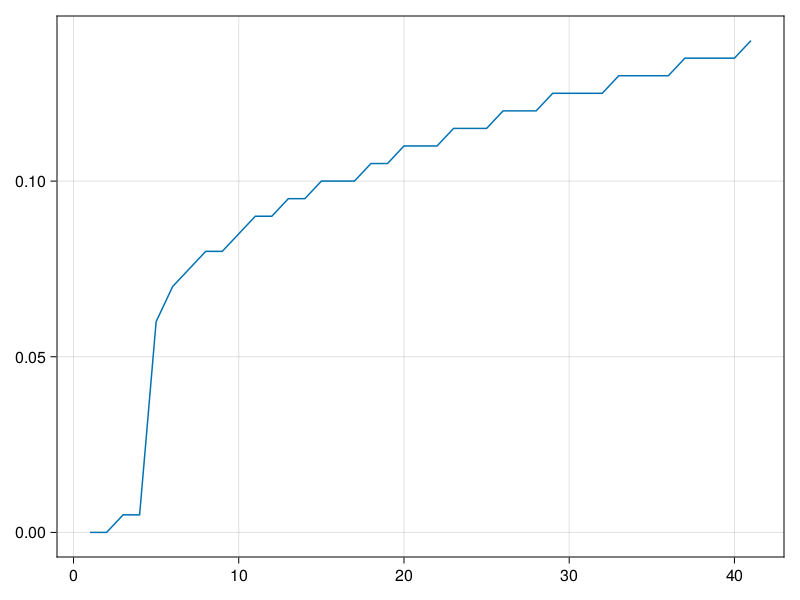

In [71]:
lines(spikeNum ./ T)

In [96]:
threshold = Vector{Float64}(undef, length([0.1:0.1:10...]));
for (j,k) in enumerate([0.1:0.1:10...])
    for i in t
        update!(singleHH, singleHH.param, [0], dt);
    end

    Iapp = 1;
    Vs = zeros(length(t)) .- 80;

    while !(maximum(Vs) > 0)
        for (i,tt) in enumerate(t)
            Ie = 0 < tt <= k ? Iapp : 0;
            update!(singleHH, singleHH.param, [Ie], dt);
            Vs[i] = singleHH.v[1]
        end
        Iapp += 1
    end
    threshold[j] = Iapp
end

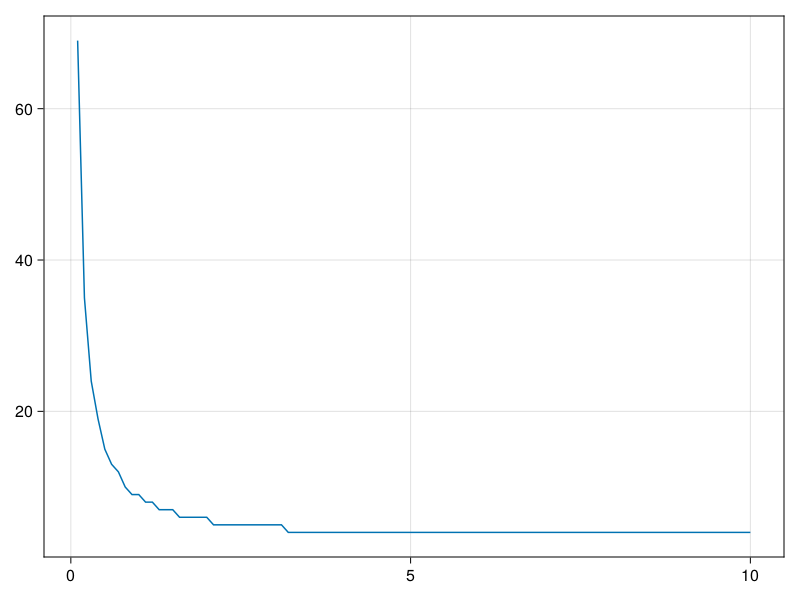

In [98]:
lines([0.1:0.1:10...],threshold)

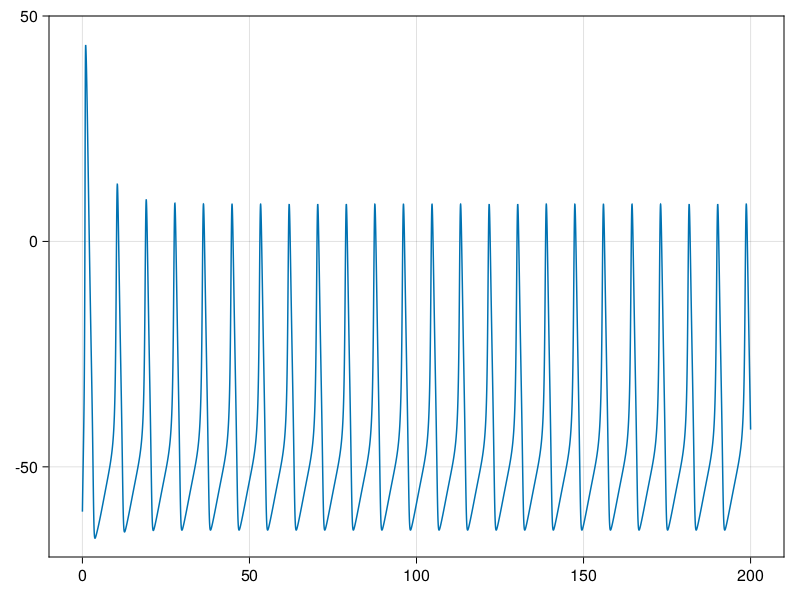

In [37]:
fig = Figure()
ax = Axis(fig[1,1])
lines!(ax,t, Vs)
ylims!(ax, -70, 50)
fig